In [77]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft2, fftshift

In [78]:
#建立模型

#點光源
def point_source(size):
    img = np.zeros((size, size))
    img[size //2, size //2] = 1.0
    return img

#Gaussian分布
def gaussian(size, sigma_x, sigma_y=None):
    if sigma_y is None:
        sigma_y = sigma_x
    x = np.linspace(-1, 1, size)
    y = np.linspace(-1, 1, size)
    X, Y = np.meshgrid(x, y)
    Z = np.exp(-(X**2 / (2*sigma_x**2)+ Y**2 / (2*sigma_y**2)))
    return Z

#disk
def disk(size, radius):
    x = np.linspace(-1, 1, size)
    y = np.linspace(-1, 1, size)
    X, Y = np.meshgrid(x, y)
    R = np.sqrt(X**2 + Y**2)
    Z = (R <= radius).astype(float)
    return Z

    #elliptical disk
def elliptical_disk(size, a, b):
    x = np.linspace(-1, 1, size)
    y = np.linspace(-1, 1, size)
    X, Y = np.meshgrid(x, y)
    Z = ((X**2 / a**2 + Y**2 / b**2) <= 1).astype(float)
    return Z

#ring
def ring(size, inner_radius, outer_radius):
    x = np.linspace(-1, 1, size)
    y = np.linspace(-1, 1, size)
    X , Y = np.meshgrid(x, y)
    R = np.sqrt(X**2 + Y**2)
    Z = ((R >= inner_radius) & (R<= outer_radius)).astype(float)
    return Z

    #elliptical_ring
def elliptical_ring(size, a, b, r_in, r_out):
    x = np.linspace(-1, 1, size)
    y = np.linspace(-1, 1, size)
    X, Y = np.meshgrid(x, y)
    R2 = X**2 / a**2 + Y**2 / b**2
    Z = ((R2 >= r_in**2) & (R2 <= r_out**2)).astype(float)
    return Z

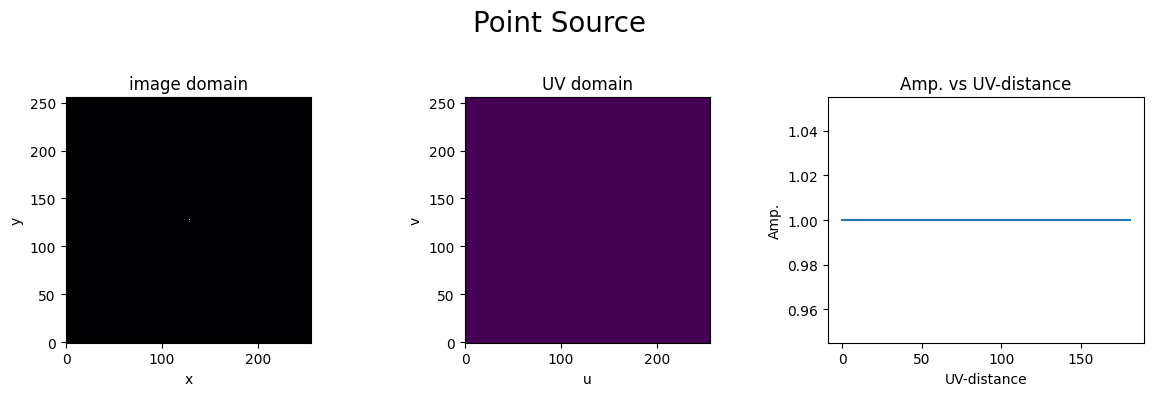

In [79]:
#畫圖

#point source
size = 256

fig, axs = plt.subplots(1,3 ,figsize=(12, 4))
img = point_source(size)

plt.suptitle("Point Source", fontsize=20)

axs[0].imshow(img, origin="lower", cmap="inferno")
axs[0].set_title("image domain")
axs[0].set_xlabel("x")
axs[0].set_ylabel("y")

#FT

vis_img = fftshift(fft2(img))
amplitude = np.abs(vis_img)

axs[1].imshow(amplitude, origin="lower", cmap="viridis")
axs[1].set_title("UV domain")
axs[1].set_xlabel("u")
axs[1].set_ylabel("v")

#建立uv-distance(前置)
u = np.arange(-size //2, size // 2)
U, V = np.meshgrid(u, u)
uv_dist = np.sqrt(U**2 + V**2).astype(int)

max_dist = uv_dist.max()
amp_profile = np.zeros(max_dist + 1)
counts = np.zeros(max_dist + 1)

#開始算
for r in range(max_dist + 1):
    mask = (uv_dist == r)
    amp_profile[r] = amplitude[mask].sum()
    counts[r] = mask.sum()

amp_profile /= counts

axs[2].plot(amp_profile)
axs[2].set_title("Amp. vs UV-distance")
axs[2].set_xlabel("UV-distance")
axs[2].set_ylabel("Amp.")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

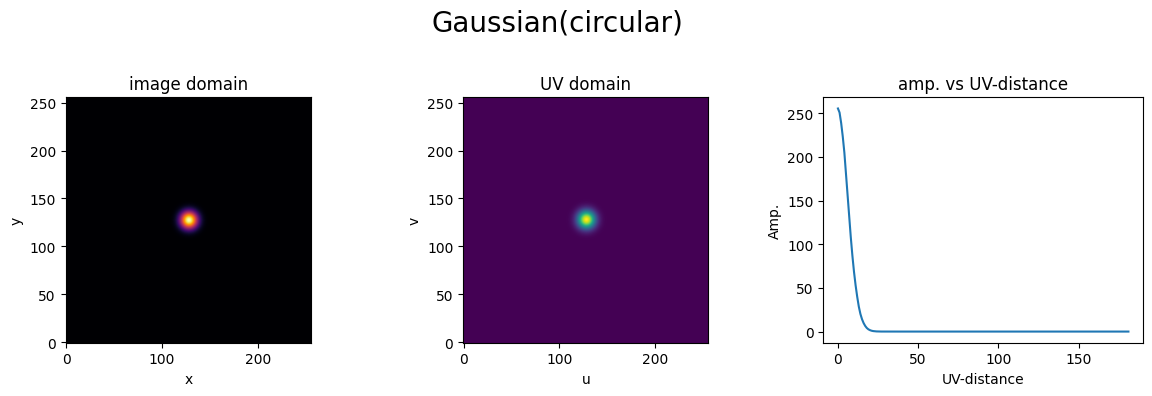

In [80]:
#高斯分布(circular)

fig, axs = plt.subplots(1,3 ,figsize=(12, 4))

#參數可調整(半徑)
img = gaussian(size, 0.05)

plt.suptitle("Gaussian(circular)", fontsize=20)

axs[0].imshow(img, origin="lower", cmap="inferno")
axs[0].set_title("image domain")
axs[0].set_xlabel("x")
axs[0].set_ylabel("y")

#FT
vis_img = fftshift(fft2(img))
amplitude = np.abs(vis_img)

axs[1].imshow(amplitude, origin="lower", cmap="viridis")
axs[1].set_title("UV domain")
axs[1].set_xlabel("u")
axs[1].set_ylabel("v")

#uv-distance
u = np.arange(-size //2, size //2)
U, V = np.meshgrid(u, u)
uv_dist = np.sqrt(U**2 + V**2).astype(int)
max_dist = uv_dist.max()
amp_profile = np.zeros(max_dist + 1)
counts = np.zeros(max_dist + 1)

for r in range(max_dist + 1):
    mask = (uv_dist == r)
    amp_profile[r] = amplitude[mask].sum()
    counts[r] = mask.sum()

amp_profile /= counts

axs[2].plot(amp_profile)
axs[2].set_title("amp. vs UV-distance")
axs[2].set_xlabel("UV-distance")
axs[2].set_ylabel("Amp.")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

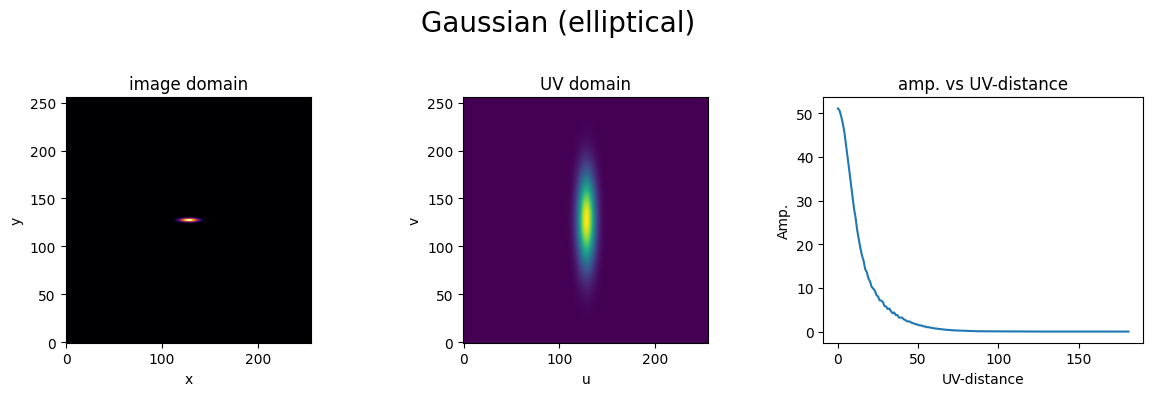

In [81]:
#高斯分布(elliptical)

fig, axs = plt.subplots(1,3 ,figsize=(12, 4))

#參數可調整（長軸,短軸）
img = gaussian(size, 0.05, 0.01)

plt.suptitle("Gaussian (elliptical)", fontsize=20)

axs[0].imshow(img, origin="lower", cmap="inferno")
axs[0].set_title("image domain")
axs[0].set_xlabel("x")
axs[0].set_ylabel("y")

#FT
vis_img = fftshift(fft2(img))
amplitude = np.abs(vis_img)

axs[1].imshow(amplitude, origin="lower", cmap="viridis")
axs[1].set_title("UV domain")
axs[1].set_xlabel("u")
axs[1].set_ylabel("v")

#uv-distance
u = np.arange(-size //2, size //2)
U, V = np.meshgrid(u, u)
uv_dist = np.sqrt(U**2 + V**2).astype(int)
max_dist = uv_dist.max()
amp_profile = np.zeros(max_dist + 1)
counts = np.zeros(max_dist + 1)

for r in range(max_dist + 1):
    mask = (uv_dist == r)
    amp_profile[r] = amplitude[mask].sum()
    counts[r] = mask.sum()

amp_profile /= counts

axs[2].plot(amp_profile)
axs[2].set_title("amp. vs UV-distance")
axs[2].set_xlabel("UV-distance")
axs[2].set_ylabel("Amp.")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

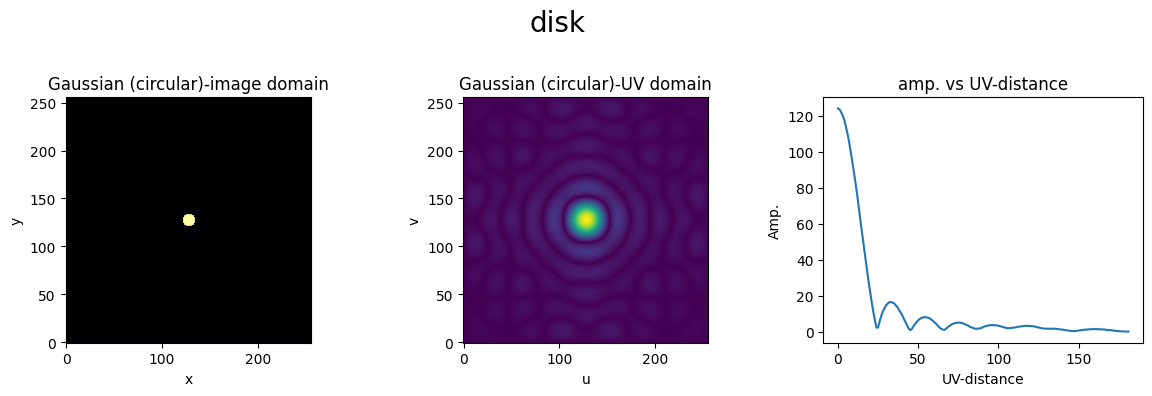

In [82]:
#disk

fig, axs = plt.subplots(1,3 ,figsize=(12, 4))

#參數可調整(半徑)
img = disk(size, 0.05)

plt.suptitle("disk", fontsize=20)

axs[0].imshow(img, origin="lower", cmap="inferno")
axs[0].set_title("Gaussian (circular)-image domain")
axs[0].set_xlabel("x")
axs[0].set_ylabel("y")

#FT
vis_img = fftshift(fft2(img))
amplitude = np.abs(vis_img)

axs[1].imshow(amplitude, origin="lower", cmap="viridis")
axs[1].set_title("Gaussian (circular)-UV domain")
axs[1].set_xlabel("u")
axs[1].set_ylabel("v")

#uv-distance
u = np.arange(-size //2, size //2)
U, V = np.meshgrid(u, u)
uv_dist = np.sqrt(U**2 + V**2).astype(int)
max_dist = uv_dist.max()
amp_profile = np.zeros(max_dist + 1)
counts = np.zeros(max_dist + 1)

for r in range(max_dist + 1):
    mask = (uv_dist == r)
    amp_profile[r] = amplitude[mask].sum()
    counts[r] = mask.sum()

amp_profile /= counts

axs[2].plot(amp_profile)
axs[2].set_title("amp. vs UV-distance")
axs[2].set_xlabel("UV-distance")
axs[2].set_ylabel("Amp.")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

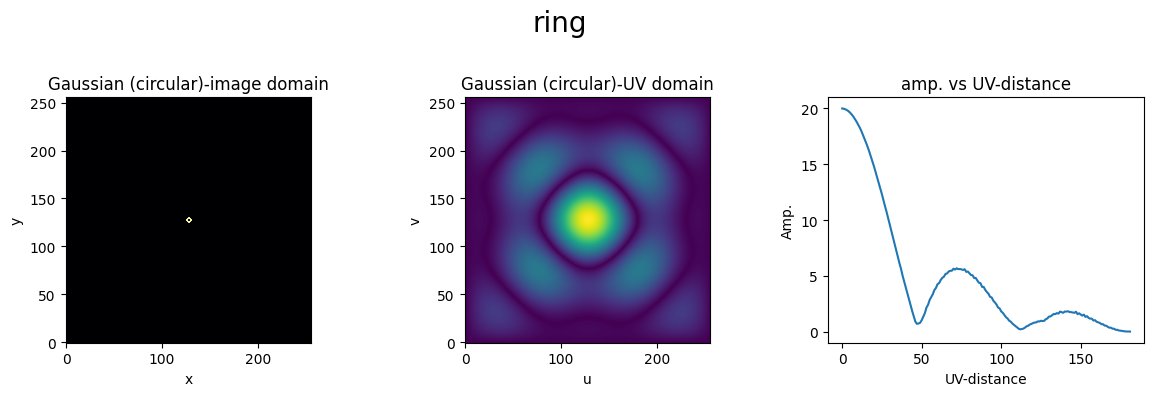

In [83]:
#ring

fig, axs = plt.subplots(1,3 ,figsize=(12, 4))

#參數可調整(內圈半徑,外圈半徑)
img = ring(size, 0.01, 0.02)

plt.suptitle("ring", fontsize=20)

axs[0].imshow(img, origin="lower", cmap="inferno")
axs[0].set_title("Gaussian (circular)-image domain")
axs[0].set_xlabel("x")
axs[0].set_ylabel("y")

#FT
vis_img = fftshift(fft2(img))
amplitude = np.abs(vis_img)

axs[1].imshow(amplitude, origin="lower", cmap="viridis")
axs[1].set_title("Gaussian (circular)-UV domain")
axs[1].set_xlabel("u")
axs[1].set_ylabel("v")

#uv-distance
u = np.arange(-size //2, size //2)
U, V = np.meshgrid(u, u)
uv_dist = np.sqrt(U**2 + V**2).astype(int)
max_dist = uv_dist.max()
amp_profile = np.zeros(max_dist + 1)
counts = np.zeros(max_dist + 1)

for r in range(max_dist + 1):
    mask = (uv_dist == r)
    amp_profile[r] = amplitude[mask].sum()
    counts[r] = mask.sum()

amp_profile /= counts

axs[2].plot(amp_profile)
axs[2].set_title("amp. vs UV-distance")
axs[2].set_xlabel("UV-distance")
axs[2].set_ylabel("Amp.")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

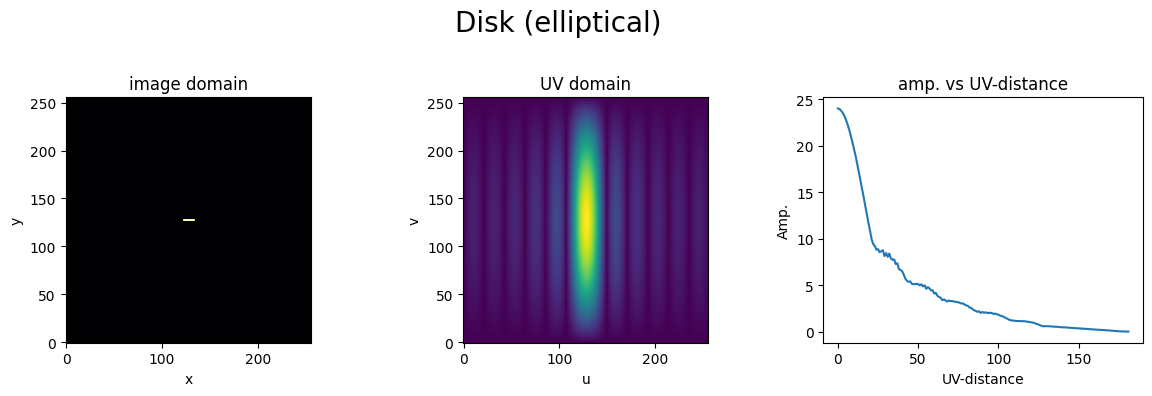

In [87]:
#橢圓環

fig, axs = plt.subplots(1,3 ,figsize=(12, 4))

#參數可調整（長軸,短軸）
img = elliptical_disk(size, 0.05, 0.01)

plt.suptitle("Disk (elliptical)", fontsize=20)

axs[0].imshow(img, origin="lower", cmap="inferno")
axs[0].set_title("image domain")
axs[0].set_xlabel("x")
axs[0].set_ylabel("y")

#FT
vis_img = fftshift(fft2(img))
amplitude = np.abs(vis_img)

axs[1].imshow(amplitude, origin="lower", cmap="viridis")
axs[1].set_title("UV domain")
axs[1].set_xlabel("u")
axs[1].set_ylabel("v")

#uv-distance
u = np.arange(-size //2, size //2)
U, V = np.meshgrid(u, u)
uv_dist = np.sqrt(U**2 + V**2).astype(int)
max_dist = uv_dist.max()
amp_profile = np.zeros(max_dist + 1)
counts = np.zeros(max_dist + 1)

for r in range(max_dist + 1):
    mask = (uv_dist == r)
    amp_profile[r] = amplitude[mask].sum()
    counts[r] = mask.sum()

amp_profile /= counts

axs[2].plot(amp_profile)
axs[2].set_title("amp. vs UV-distance")
axs[2].set_xlabel("UV-distance")
axs[2].set_ylabel("Amp.")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

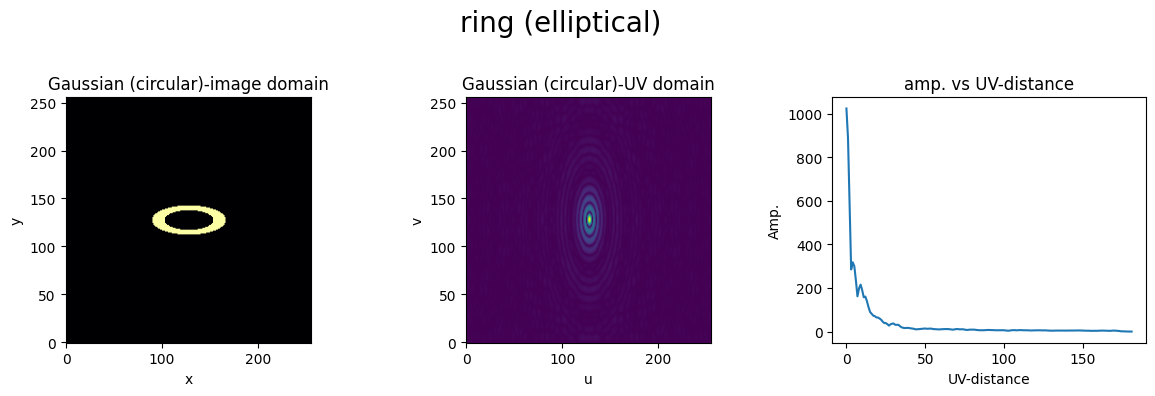

In [88]:
#ring

fig, axs = plt.subplots(1,3 ,figsize=(12, 4))

#參數可調整(長軸,短軸,Rin,Rout)
img = elliptical_ring(size, 0.5, 0.2, 0.4, 0.6)

plt.suptitle("ring (elliptical)", fontsize=20)

axs[0].imshow(img, origin="lower", cmap="inferno")
axs[0].set_title("Gaussian (circular)-image domain")
axs[0].set_xlabel("x")
axs[0].set_ylabel("y")

#FT
vis_img = fftshift(fft2(img))
amplitude = np.abs(vis_img)

axs[1].imshow(amplitude, origin="lower", cmap="viridis")
axs[1].set_title("Gaussian (circular)-UV domain")
axs[1].set_xlabel("u")
axs[1].set_ylabel("v")

#uv-distance
u = np.arange(-size //2, size //2)
U, V = np.meshgrid(u, u)
uv_dist = np.sqrt(U**2 + V**2).astype(int)
max_dist = uv_dist.max()
amp_profile = np.zeros(max_dist + 1)
counts = np.zeros(max_dist + 1)

for r in range(max_dist + 1):
    mask = (uv_dist == r)
    amp_profile[r] = amplitude[mask].sum()
    counts[r] = mask.sum()

amp_profile /= counts

axs[2].plot(amp_profile)
axs[2].set_title("amp. vs UV-distance")
axs[2].set_xlabel("UV-distance")
axs[2].set_ylabel("Amp.")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [86]:

'''
#四個東西
size = 256
model = [("Point Source", point_source(size)),
         ("Gaussian (circular)", gaussian(size, 0.05)),
         ("Gaussian (elliptical)", gaussian(size, 0.01, 0.05)),
         ("Disk", disk(size, 0.05))]

for i, (title, img) in enumerate(model):
    #intensity
    axs[i, 0].imshow(img, origin='lower', cmap='inferno')
    axs[i, 0].set_title(title)
    axs[i, 0].set_xlabel("x")
    axs[i, 0].set_ylabel("y")

    #FT
    vis_img = fftshift(fft2(img))
    amplitude = np.abs(vis_img)

    axs[i, 1].imshow(amplitude, origin='lower', cmap='viridis')
    axs[i, 1].set_title("UV domain")
    axs[i, 1].set_xlabel("u")
    axs[i, 1].set_ylabel("v")

    #uv-distance profile（圓對稱平均）
    u = np.arange(-size // 2, size // 2)
    U, V = np.meshgrid(u, u)
    uv_dist = np.sqrt(U**2 + V**2).astype(int)  #把距離轉成整數

    max_dist = uv_dist.max()
    amp_profile = np.zeros(max_dist + 1)    #每個振幅點總和
    counts = np.zeros(max_dist + 1) #每個r有幾個點，用來平均

    for r in range(max_dist + 1):
        mask = (uv_dist == r)   #找出距離=r的點
        amp_profile[r] = amplitude[mask].sum()  #總和
        counts[r] = mask.sum()  #圓環裡有幾個點
    amp_profile /= counts

    axs[i, 2].plot(amp_profile)
    axs[i, 2].set_title('Amplitude vs. UV-distance')
    axs[i, 2].set_xlabel('UV-distance (arb. units)')
    axs[i, 2].set_ylabel('Amplitude')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()'''

'\n#四個東西\nsize = 256\nmodel = [("Point Source", point_source(size)),\n         ("Gaussian (circular)", gaussian(size, 0.05)),\n         ("Gaussian (elliptical)", gaussian(size, 0.01, 0.05)),\n         ("Disk", disk(size, 0.05))]\n\nfor i, (title, img) in enumerate(model):\n    #intensity\n    axs[i, 0].imshow(img, origin=\'lower\', cmap=\'inferno\')\n    axs[i, 0].set_title(title)\n    axs[i, 0].set_xlabel("x")\n    axs[i, 0].set_ylabel("y")\n\n    #FT\n    vis_img = fftshift(fft2(img))\n    amplitude = np.abs(vis_img)\n\n    axs[i, 1].imshow(amplitude, origin=\'lower\', cmap=\'viridis\')\n    axs[i, 1].set_title("UV domain")\n    axs[i, 1].set_xlabel("u")\n    axs[i, 1].set_ylabel("v")\n\n    #uv-distance profile（圓對稱平均）\n    u = np.arange(-size // 2, size // 2)\n    U, V = np.meshgrid(u, u)\n    uv_dist = np.sqrt(U**2 + V**2).astype(int)  #把距離轉成整數\n\n    max_dist = uv_dist.max()\n    amp_profile = np.zeros(max_dist + 1)    #每個振幅點總和\n    counts = np.zeros(max_dist + 1) #每個r有幾個點，用來平均\n\